In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from src.helpers import multivariant_analysis, load_csv


FILENAME = "drug_sex_values.csv"
filepath = f"../data/{FILENAME}"

In [159]:
drug_sex_df = load_csv(filepath)

In [160]:
drug_sex_df = drug_sex_df.drop(columns=['all opioids', 'stimulants', 'cannabis', 'benzodiazepine', 'value'])
drug_sex_df['setting'] = drug_sex_df['setting'].replace({'ip': 'In Patient', 'ed': 'Emergency Department'})


In [161]:
drug_sex_df.head()

,sex,time,start_time,end_time,setting,all drugs
0,female,1,01/01/2020,01/31/2020,In Patient,4812.0
1,female,1,01/01/2020,01/31/2020,Emergency Department,18839.0
2,male,1,01/01/2020,01/31/2020,In Patient,5482.0
3,male,1,01/01/2020,01/31/2020,Emergency Department,18367.0
4,female,2,02/01/2020,02/29/2020,In Patient,4659.0


In [162]:
drug_sex_df['all drugs'].describe()

count      164.000000
mean      9420.329268
std       5294.194074
min       1692.000000
25%       4421.500000
50%       6489.500000
75%      14640.750000
max      18839.000000
Name: all drugs, dtype: float64

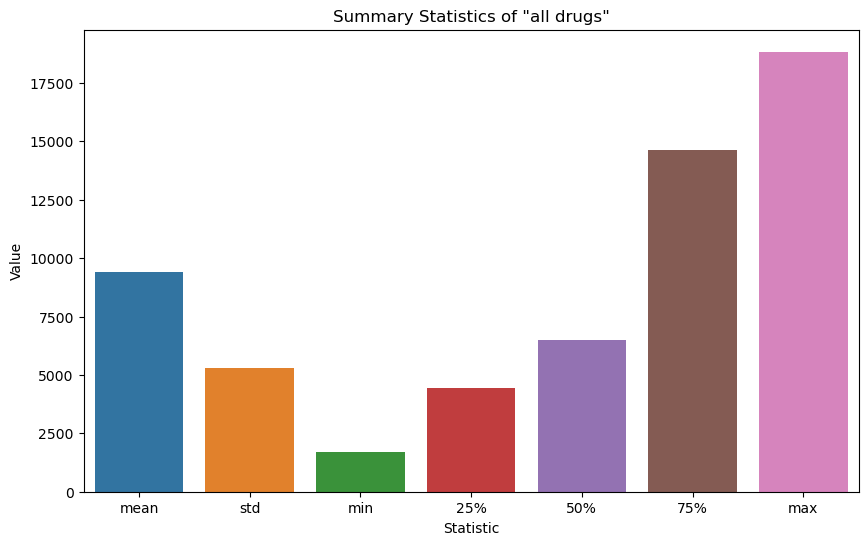

In [163]:
# Extracting the results of describe() for 'all drugs'
describe_results = data['all drugs'].describe()

# Removing the 'count' statistic as it won't fit well in this visualization
describe_results = describe_results.drop('count')

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=describe_results.index, y=describe_results.values)
plt.title('Summary Statistics of "all drugs"')
plt.ylabel('Value')
plt.xlabel('Statistic')
plt.show()

# Scatter plot of 'all drugs' count vs. time

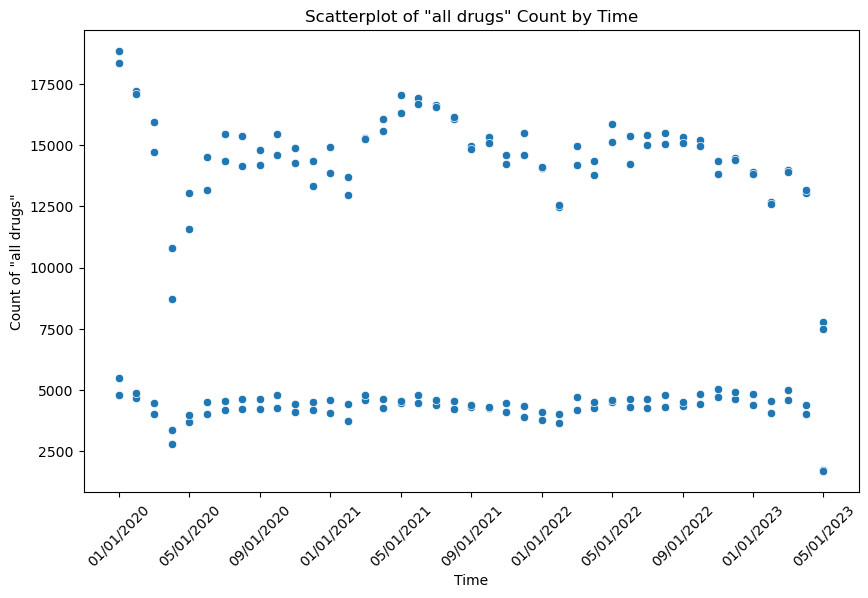

In [164]:

unique_dates = drug_sex_df['start_time'].unique()
selected_dates = unique_dates[::4]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=drug_sex_df['start_time'], y=drug_sex_df['all drugs'])
plt.xlabel('Time')
plt.xticks(selected_dates, rotation=45)
plt.ylabel('Count of "all drugs"')
plt.title('Scatterplot of "all drugs" Count by Time')
plt.show()

# Plotting the relationship between 'sex' and 'all drugs'


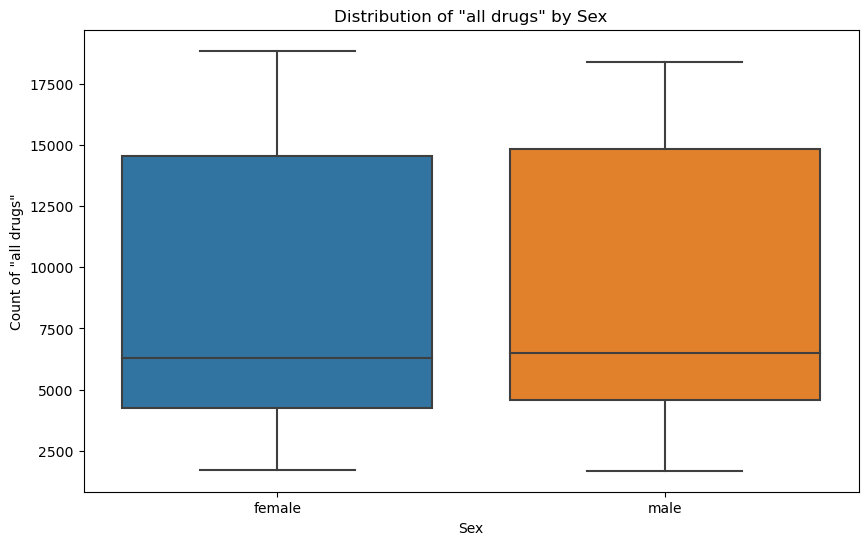

In [165]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='all drugs', data=drug_sex_df)
plt.title('Distribution of "all drugs" by Sex')
plt.ylabel('Count of "all drugs"')
plt.xlabel('Sex')
plt.show()

# Plotting the relationship between 'setting' and 'all drugs'


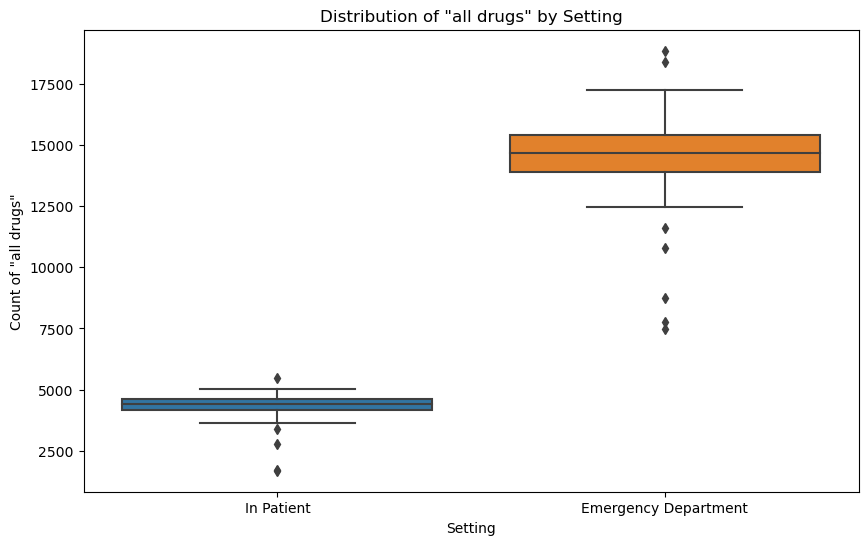

In [166]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='setting', y='all drugs', data=drug_sex_df)
plt.title('Distribution of "all drugs" by Setting')
plt.ylabel('Count of "all drugs"')
plt.xlabel('Setting')
plt.show()

# Plotting the relationship between 'time' and 'all drugs'

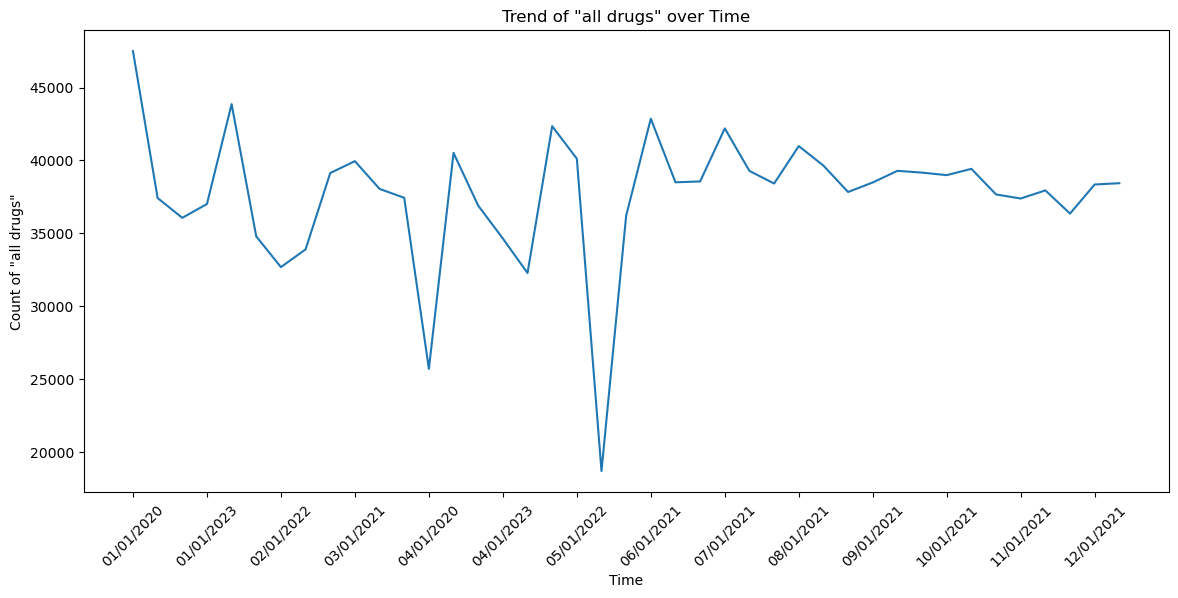

In [167]:

# Aggregate all rows to get total count by each month
agg_drug_data = drug_sex_df.groupby('start_time')['all drugs'].sum().reset_index()
unique_dates = agg_drug_data['start_time'].unique()

# This allows us to label x axis with dates that are 3 months apart, and not clutter the graph
selected_dates = unique_dates[::3]

plt.figure(figsize=(14, 6))
sns.lineplot(x='start_time', y='all drugs', data=agg_drug_data, ci=None)
plt.title('Trend of "all drugs" over Time')
plt.ylabel('Count of "all drugs"')
plt.xticks(selected_dates, rotation=45)
plt.xlabel('Time')
plt.show()

all drugs


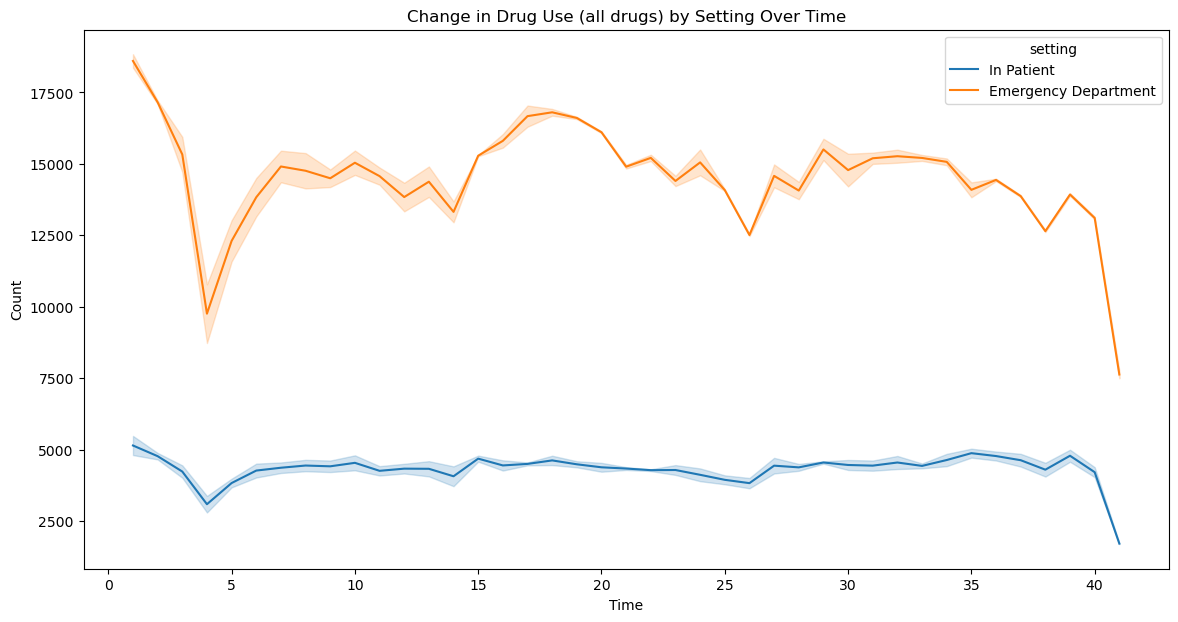

In [145]:
info_columns_to_exclude = ['sex', 'setting', 'time', 'start_time', 'end_time']
for col in drug_sex_df.columns:
    if col not in info_columns_to_exclude:
        print(col)
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=drug_sex_df, x='time', y=col, hue='setting')
        title = f"Change in Drug Use ({col}) by Setting Over Time"
        plt.title(title)
        plt.ylabel('Count')
        plt.xlabel('Time')
        plt.show()